In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
auto=autoDF2.dropna()
auto=auto[['horsepower','mpg']].sort_values('horsepower')
#X=auto[['horsepower']]
#y=auto['mpg']
auto

,horsepower,mpg
19,46.0,26.0
102,46.0,26.0
326,48.0,43.4
325,48.0,44.3
244,48.0,43.1
117,49.0,29.0
195,52.0,29.0
246,52.0,32.8
394,52.0,44.0
144,52.0,31.0


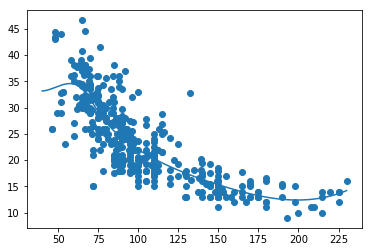

In [32]:
from scipy.interpolate import LSQUnivariateSpline
knots=[65,75,100,150]
X=np.array(auto['horsepower'])
y=np.array(auto['mpg'])
s = LSQUnivariateSpline(X,y,knots)
xs = linspace(40,230,1000)
ys = s(xs)
plt.scatter(X, y)
plt.plot(xs, ys)
plt.show()

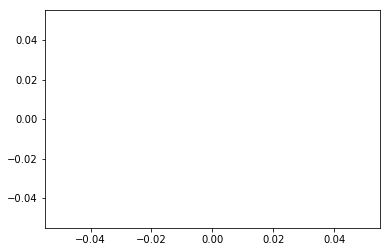

array([  46.,   46.,   48.,   48.,   48.,   49.,   52.,   52.,   52.,
         52.,   53.,   53.,   54.,   58.,   58.,   60.,   60.,   60.,
         60.,   60.,   61.,   62.,   62.,   63.,   63.,   63.,   64.,
         65.,   65.,   65.,   65.,   65.,   65.,   65.,   65.,   65.,
         65.,   66.,   67.,   67.,   67.,   67.,   67.,   67.,   67.,
         67.,   67.,   67.,   67.,   67.,   68.,   68.,   68.,   68.,
         68.,   68.,   69.,   69.,   69.,   70.,   70.,   70.,   70.,
         70.,   70.,   70.,   70.,   70.,   70.,   70.,   70.,   71.,
         71.,   71.,   71.,   71.,   72.,   72.,   72.,   72.,   72.,
         72.,   74.,   74.,   74.,   75.,   75.,   75.,   75.,   75.,
         75.,   75.,   75.,   75.,   75.,   75.,   75.,   75.,   75.,
         76.,   76.,   76.,   76.,   77.,   78.,   78.,   78.,   78.,
         78.,   78.,   79.,   79.,   80.,   80.,   80.,   80.,   80.,
         80.,   80.,   81.,   81.,   82.,   83.,   83.,   83.,   83.,
         84.,   84.,

In [84]:
from scipy.interpolate import UnivariateSpline

X=np.array(auto['horsepower'])
y=np.array(auto['mpg'])
s = UnivariateSpline(X, y,k=4,s=1)
xs = linspace(40,230,100)
ys = s(xs)
#plt.scatter(X, y)
plt.plot(X, s(X))
plt.show()
X

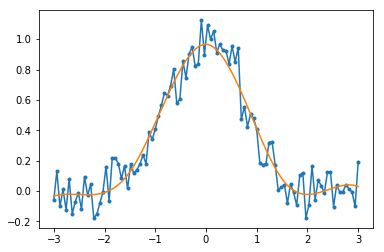

In [42]:
from numpy import linspace,exp
from numpy.random import randn
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = linspace(-3, 3, 100)
y = exp(-x**2) + randn(100)/10
s = UnivariateSpline(x, y, s=1)
xs = linspace(-3, 3, 1000)
ys = s(xs)
plt.plot(x, y, '.-')
plt.plot(xs, ys)
plt.show()